# Trip duration prediction model

At some point or the other almost each one of us has used an Ola or Uber for taking a ride.

<p align = "center"> <img  src = "./Uber.jpg" alt = "New York City Taxi Uber">
</p>

Ride hailing services are services that use online-enabled platforms to connect between passengers and local drivers using their personal vehicles. In most cases they are a comfortable method for door-to-door transport. Usually they are cheaper than using licensed taxicabs. Examples of ride hailing services include Uber and Lyft.

To improve the efficiency of taxi dispatching systems for such services, it's important to be able to predict how long a driver will have his taxi occupied. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.

## Recall of features

> #### Initial Features

| **`Columns`**        | **`Description`**  |  
| ------------- |-------------:|
| id  | A unique identifier for each trip|
| vendor_id |A code indicating the provider associated with the trip record|
| pickup_datetime| Date and time when the meter was engaged|
| dropoff_datetime| Date and time when the meter was disengaged|
|passenger_count|Number of passengers in vehicle during trip|
| pickup_latitude |Pickup location Latitude|
| pickup_longitude |  Pickup location Longitude|
| dropoff_latitude    | Dropoff location latitude  |
| dropoff_longitude     | Dropoff location longitude|
| store_and_fwd_flag |This flag indicated whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y for yes / N for no )|
| trip_duration  | Duration of Trip |

> ### After Assessing and EDA

| **`Columns`**        | **`Description`**  |  
| ------------- |-------------:|
| passenger_count |Number of passengers in vehicle during trip|
| trip_duration  | Duration of Trip |
|month_pickup_datetime|Month of pickup extracted from pickup datetime feature|
|hour_pickup_datetime|Hour of pickup extracted from pickup datetime feature|
|day_pickup_datetime|Day of pickup extracted from pickup datetime feature|
|month_dropoff_datetime|Month of Dropoff extracted from Dropoff datetime feature|
|hour_dropoff_datetime|Hour of Dropoff extracted from Dropoff datetime feature|
|day_dropoff_datetime|Day of Dropoff extracted from Dropoff datetime feature|
|Distance_pick_drop | Distance computed for trip|
|day_moments| Moments of day (Morning, afternoon, evening,...)|
|distance_slots|short or long distance|

> ### Full summary of EDA

* There is similar relation between the pickup and dropoff moments.
* The outliers are in number in data. We should manage them to justify the pickup and dropoff moments.
* We removed from data , trips without passengers.
* Too many variables with insignificant correlation.But the day, month and hour of pickups are highly correlated to those of dropoff.
* The distance_pick_drop is moderately correlated to trip duration by referring to Spearman comparison.
* The difference between the distances by day moments is very significant.
* The difference between the number of passengers by day moments is very significant. We can see that most of long distance are made during evening by taxi having between 2 and 4 passengers. As the distance increases, the number of passengers decreases.
* The difference between the trip duration during day and by night is significant. Also between trip duration for evening and middle morning, and also between all others day moments. 
* As expected the trip duration increases with the distance traveled.
* The difference between the trip distance with 1 and more passengers is significant. The difference between the trip duration with 2 passengers and 3 up to 4 passengers is not significant. But from 5 passengers the trip duration decreases significantly compared to with 2, 3, 4. Therefore the difference between taxi travel time with 5 and 6 passengers is not significant.


## Loading Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,median_absolute_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading Data

In [2]:
df = pd.read_csv('./trip_data.csv')

In [3]:
df.head()

,passenger_count,trip_duration,day_pickup_datetime,month_pickup_datetime,hour_pickup_datetime,day_of_week_pickup_datetime,day_dropoff_datetime,month_dropoff_datetime,hour_dropoff_datetime,day_of_week_dropoff_datetime,Distance_pick_drop,day_moments,distance_slots
0,1,400.0,29,2,16,0,29,2,16,0,1.199073,Afternoon,Shortest_distance
1,2,1100.0,11,3,23,4,11,3,23,4,4.129111,Evening,Long_distance
2,2,1635.0,21,2,17,6,21,2,18,6,7.250753,Afternoon,Long_distance
3,6,1141.0,5,1,9,1,5,1,10,1,2.361097,Early_morning,Shortest_distance
4,1,848.0,17,2,6,2,17,2,6,2,4.328534,Early_morning,Long_distance


In [4]:
df.dtypes

passenger_count                   int64
trip_duration                   float64
day_pickup_datetime               int64
month_pickup_datetime             int64
hour_pickup_datetime              int64
day_of_week_pickup_datetime       int64
day_dropoff_datetime              int64
month_dropoff_datetime            int64
hour_dropoff_datetime             int64
day_of_week_dropoff_datetime      int64
Distance_pick_drop              float64
day_moments                      object
distance_slots                   object
dtype: object

In [5]:
df.describe(include='O')

,day_moments,distance_slots
count,726075,726075
unique,5,2
top,Evening,Shortest_distance
freq,249177,477794


### Preprocessing

Now, before applying linear model such as logistic regression and others, we need to scale the data and keep all features as numeric strictly. 


### Dummies with Multiple Categories

In [6]:
# Convert categorical variables to one hot encoded features
cat_vars = ['passenger_count','day_moments','distance_slots', 'day_of_week_dropoff_datetime', 'day_of_week_pickup_datetime']
for el in cat_vars:
    df = pd.concat([df,pd.get_dummies(df[el],prefix = str(el),prefix_sep='_')],axis = 1)
df.head()

,passenger_count,trip_duration,day_pickup_datetime,month_pickup_datetime,hour_pickup_datetime,day_of_week_pickup_datetime,day_dropoff_datetime,month_dropoff_datetime,hour_dropoff_datetime,day_of_week_dropoff_datetime,...,day_of_week_dropoff_datetime_4,day_of_week_dropoff_datetime_5,day_of_week_dropoff_datetime_6,day_of_week_pickup_datetime_0,day_of_week_pickup_datetime_1,day_of_week_pickup_datetime_2,day_of_week_pickup_datetime_3,day_of_week_pickup_datetime_4,day_of_week_pickup_datetime_5,day_of_week_pickup_datetime_6
0,1,400.0,29,2,16,0,29,2,16,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1100.0,11,3,23,4,11,3,23,4,...,1,0,0,0,0,0,0,1,0,0
2,2,1635.0,21,2,17,6,21,2,18,6,...,0,0,1,0,0,0,0,0,0,1
3,6,1141.0,5,1,9,1,5,1,10,1,...,0,0,0,0,1,0,0,0,0,0
4,1,848.0,17,2,6,2,17,2,6,2,...,0,0,0,0,0,1,0,0,0,0


(array([ 50659., 146457., 144868., 111909.,  81814.,  56273.,  39099.,
         26903.,  18511.,  49582.]),
 array([1.00000e+00, 2.10450e+02, 4.19900e+02, 6.29350e+02, 8.38800e+02,
        1.04825e+03, 1.25770e+03, 1.46715e+03, 1.67660e+03, 1.88605e+03,
        2.09550e+03]),
 <BarContainer object of 10 artists>)

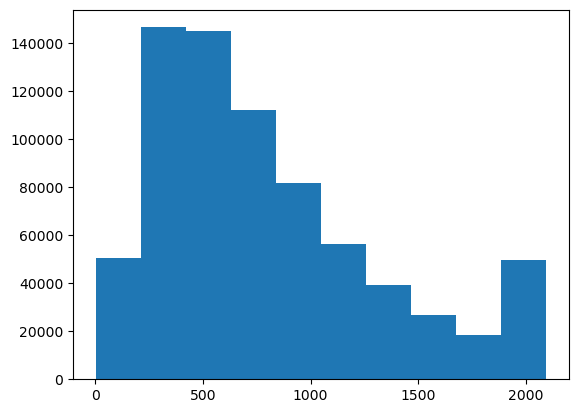

In [7]:
# Before scale numerical features let's see one more time its distribution
plt.hist(df.trip_duration)

(array([ 68558., 191385., 142337.,  88973.,  55760.,  37122.,  26657.,
         19993.,  14716.,  80574.]),
 array([1.06156854e-03, 7.87455412e-01, 1.57384925e+00, 2.36024310e+00,
        3.14663694e+00, 3.93303078e+00, 4.71942463e+00, 5.50581847e+00,
        6.29221231e+00, 7.07860616e+00, 7.86500000e+00]),
 <BarContainer object of 10 artists>)

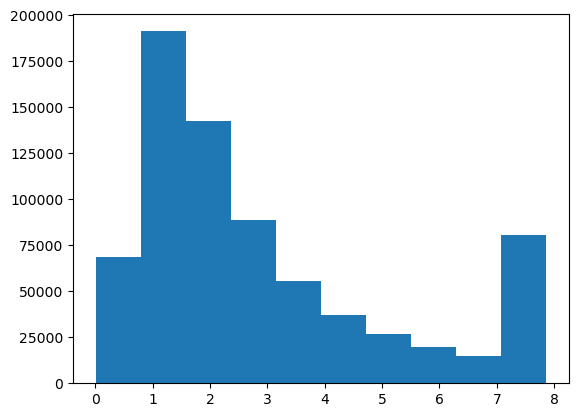

In [8]:
plt.hist(df.Distance_pick_drop)

In [9]:
print(df[['trip_duration','Distance_pick_drop']].describe())
print(df[['trip_duration','Distance_pick_drop']].skew())

       trip_duration  Distance_pick_drop
count  726075.000000       726075.000000
mean      802.864444            2.916481
std       528.874250            2.247042
min         1.000000            0.001062
25%       398.000000            1.242392
50%       664.000000            2.105738
75%      1077.000000            3.889779
max      2095.500000            7.865000
trip_duration         0.969453
Distance_pick_drop    1.100163
dtype: float64


The two numerical distributions are similar and strongly skewed at right.

df = pd.read_csv('./trip_data.csv')

### Scaling Numerical Features for Logistic Regression

* Log Transformation
* Standard Scaler

Standard scaling is anyways a necessity when it comes to linear models and we have done that here after doing log transformation on all numerical features.

In [10]:
num_cols = ['Distance_pick_drop']
for i in num_cols:
    df[i] = np.log(df[i]+10)

std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

(array([ 33635., 145164., 148321., 108733.,  73403.,  50028.,  35770.,
         26699.,  20084.,  84238.]),
 array([-1.49309175, -1.13522592, -0.77736009, -0.41949427, -0.06162844,
         0.29623739,  0.65410321,  1.01196904,  1.36983486,  1.72770069,
         2.08556652]),
 <BarContainer object of 10 artists>)

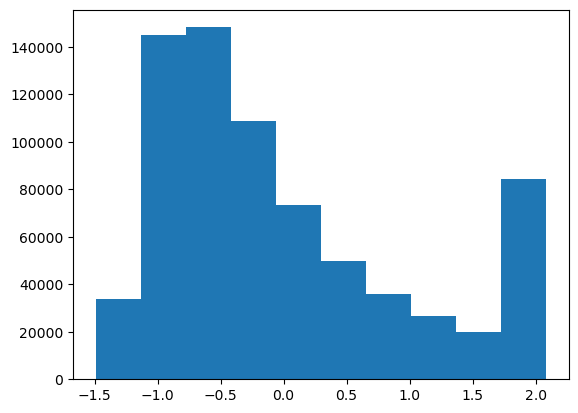

In [11]:
plt.hist(scaled.Distance_pick_drop)

In [12]:
df_df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

In [13]:
y_all = df.trip_duration

## Model Building and Evaluation Metrics
Since this is a regression problem, we could use the following 2 metrics:

1. Mean Squared Error
2. Adjusted R²

We want to predict with good precision the trip duration. If the estimate time for a trip is more than reality that will not a matter but the reverse could discredit the taxi services.So we want reduce at maximum FP( False positive). As we are facing a regression problem the more suitable metrics are MSE/MAE or R²/Adjusted R².




### Conclusions from EDA
* The distance_pick_drop is moderately correlated to trip duration by referring to Spearman comparison.
* The difference between the trip duration during day and by night is significant. Also between trip duration for evening and middle morning, and also between all others day moments. 
* As expected the trip duration increases with the distance traveled.
* All trips durations discrepancies through the week are very significant between them.
* The difference between the trip distance with 1 and more passengers is significant. The difference between the trip duration with 2 passengers and 3 up to 4 passengers is not significant. But from 5 passengers the trip duration decreases significantly compared to with 2, 3, 4. Therefore the difference between taxi travel time with 5 and 6 passengers is not significant.That means that taxi which bring 5 customers in most of cases go to same point.

Now, we will first split our dataset into test and train and using the above conclusions select columns and build a baseline linear regression model to check the MSE Score & the R² score.


### Baseline Columns

In [14]:
df.columns

Index(['passenger_count', 'trip_duration', 'day_pickup_datetime',
       'month_pickup_datetime', 'hour_pickup_datetime',
       'day_of_week_pickup_datetime', 'day_dropoff_datetime',
       'month_dropoff_datetime', 'hour_dropoff_datetime',
       'day_of_week_dropoff_datetime', 'day_moments', 'distance_slots',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'passenger_count_7', 'day_moments_Afternoon',
       'day_moments_Early_morning', 'day_moments_Evening',
       'day_moments_Full_night', 'day_moments_Middle_morning',
       'distance_slots_Long_distance', 'distance_slots_Shortest_distance',
       'day_of_week_dropoff_datetime_0', 'day_of_week_dropoff_datetime_1',
       'day_of_week_dropoff_datetime_2', 'day_of_week_dropoff_datetime_3',
       'day_of_week_dropoff_datetime_4', 'day_of_week_dropoff_datetime_5',
       'day_of_week_dropoff_datetime_6', 'day_of_week_pickup_datetime_0

In [15]:
df.dtypes

passenger_count                       int64
trip_duration                       float64
day_pickup_datetime                   int64
month_pickup_datetime                 int64
hour_pickup_datetime                  int64
day_of_week_pickup_datetime           int64
day_dropoff_datetime                  int64
month_dropoff_datetime                int64
hour_dropoff_datetime                 int64
day_of_week_dropoff_datetime          int64
day_moments                          object
distance_slots                       object
passenger_count_1                     uint8
passenger_count_2                     uint8
passenger_count_3                     uint8
passenger_count_4                     uint8
passenger_count_5                     uint8
passenger_count_6                     uint8
passenger_count_7                     uint8
day_moments_Afternoon                 uint8
day_moments_Early_morning             uint8
day_moments_Evening                   uint8
day_moments_Full_night          

In [16]:
baseline_cols = ['day_pickup_datetime', 'month_pickup_datetime',
       'hour_pickup_datetime', 'day_dropoff_datetime',
       'month_dropoff_datetime', 'hour_dropoff_datetime','passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'passenger_count_7', 'day_moments_Afternoon',
       'day_moments_Early_morning', 'day_moments_Evening',
       'day_moments_Full_night', 'day_moments_Middle_morning',
       'distance_slots_Long_distance', 'distance_slots_Shortest_distance',
       'Distance_pick_drop','day_of_week_dropoff_datetime_0', 'day_of_week_dropoff_datetime_1',
       'day_of_week_dropoff_datetime_2', 'day_of_week_dropoff_datetime_3',
       'day_of_week_dropoff_datetime_4', 'day_of_week_dropoff_datetime_5',
       'day_of_week_dropoff_datetime_6', 'day_of_week_pickup_datetime_0',
       'day_of_week_pickup_datetime_1', 'day_of_week_pickup_datetime_2',
       'day_of_week_pickup_datetime_3', 'day_of_week_pickup_datetime_4',
       'day_of_week_pickup_datetime_5', 'day_of_week_pickup_datetime_6']

In [17]:
df_baseline = df[baseline_cols]

### Train Test Split to create a validation set

In [18]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=64, stratify = y_all)

In [19]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae, r2_score, mean_squared_error as mse
LinReg = LR()
LinReg.fit(xtrain,ytrain)

LinearRegression()

In [20]:
# Predicting on the train set
train_predict = LinReg.predict(xtrain)
k = mae(train_predict,ytrain)
print('Training Mean Absolute Error: ',k)
# Predicting on the test set
test_predict = LinReg.predict(xtest)
kt = mae(ytest,test_predict)
print('Testing Mean Absolute Error: ',kt)
print('R2_Score for this baseline model:',r2_score(ytest,test_predict))
print('MSE for model: ', mse(ytest,test_predict))

Training Mean Absolute Error:  223.78645489956486
Testing Mean Absolute Error:  223.878331396225
R2_Score for this baseline model: 0.6818962657503922
MSE for model:  88965.59489067519


In [21]:
#Parameters of linear Regression
LinReg.coef_

array([-1.04137742e+03, -3.17276758e+04, -5.94171441e+01,  1.04177667e+03,
        3.17403982e+04,  4.78710051e+01, -1.56675577e+01,  3.98046079e+00,
        1.37010004e+01,  1.62925465e+01, -9.94558925e+00, -8.36086073e+00,
        3.31965566e-11,  1.52542170e+02, -5.72973077e+01,  8.19585512e+01,
       -2.71532923e+02,  9.43295095e+01, -1.51218806e+01,  1.51218806e+01,
        4.36057965e+02,  1.49703984e+02,  3.90241500e+01, -8.58897656e+01,
       -1.57776658e+02, -1.22953971e+02,  2.73953877e+00,  1.75152721e+02,
       -1.87453668e+02, -1.53449950e+01,  1.30090717e+02,  2.05565875e+02,
        1.58025216e+02, -2.97387233e+01, -2.61144422e+02])

Text(0.5, 1.0, 'Coefficients plot')

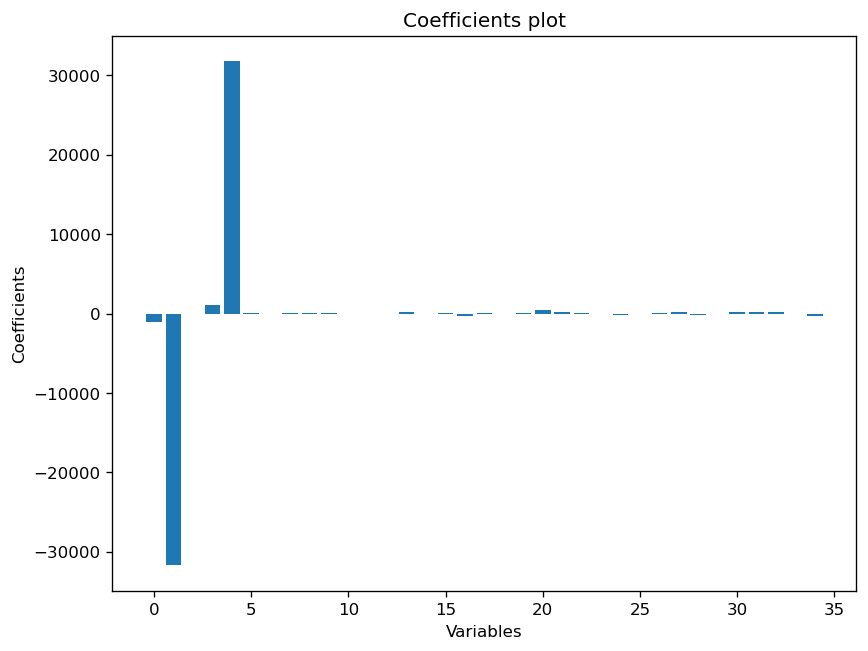

In [22]:
# Plotting the coefficients
plt.figure(figsize = (8,6),dpi = 120, facecolor='w', edgecolor='b' )
x = range(len(xtrain.columns))
y = LinReg.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients plot')

In [23]:
# Test set predicting
test_predict = LinReg.predict(xtest)

# Checking Assumptions of Linear Model
residuals = pd.DataFrame({
    'fitted_values' : ytest,
    'predicted_values': test_predict
})
residuals['residuals'] = residuals['fitted_values'] - residuals['predicted_values']
residuals.head()

,fitted_values,predicted_values,residuals
691198,734.0,365.024375,368.975625
117648,711.0,808.051662,-97.051662
288316,759.0,944.929021,-185.929021
179599,1067.0,1098.349121,-31.349121
244373,401.0,421.409364,-20.409364


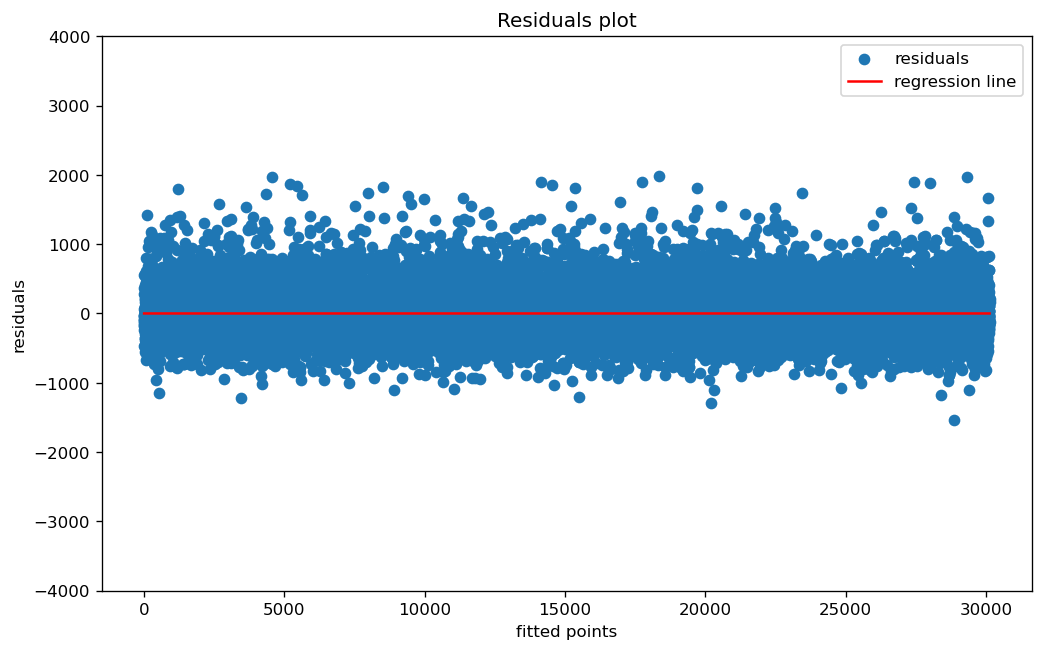

In [24]:
# Plotting residual curve (Is these constant variance or homoscedastic)

plt.figure(figsize =(10,6), dpi =120, facecolor='w',edgecolor='b')
f = range(0,30131)
k = [0 for i in range (0,30131)]
plt.scatter(f, residuals.residuals[:30131],label = 'residuals')
plt.plot(f, k, color = 'red',label = 'regression line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('Residuals plot')
plt.ylim(-4000,4000)
plt.legend()

There is homoscedasticity of residual variance.

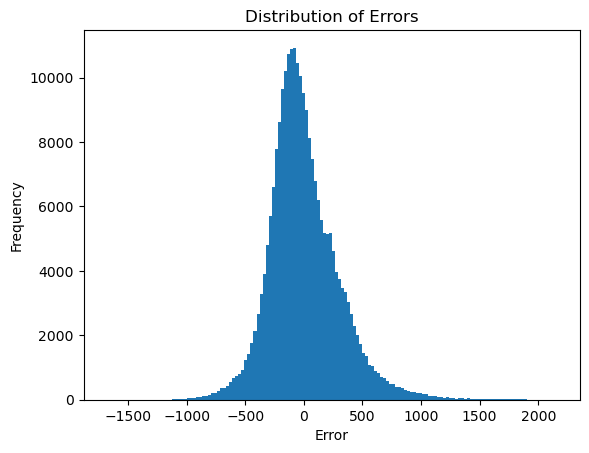

In [25]:
# Normality checking for residuals
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

The errors follow a normal distribution but roughly skewed.

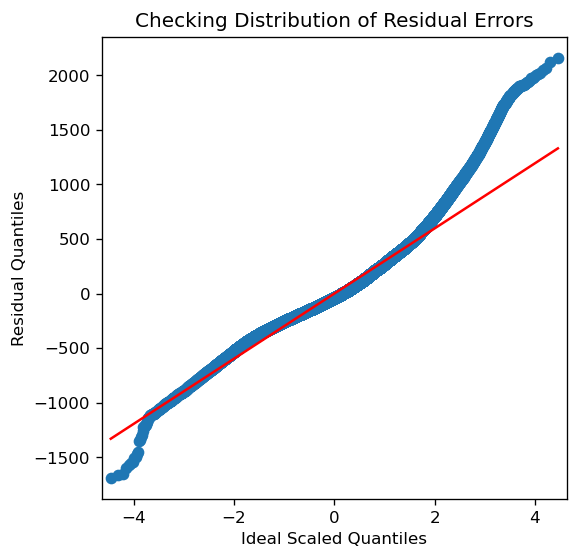

In [26]:
# QQ Plot (Is the data normally distributed?)
from statsmodels.graphics.gofplots import qqplot

# Plotting the QQ Plot
fig , ax = plt.subplots(figsize = (5,5), dpi = 120)
qqplot(residuals.residuals, line = 's', ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking Distribution of Residual Errors')
plt.show()

In [27]:
from scipy.stats import shapiro
shapiro(residuals.residuals)

ShapiroResult(statistic=0.9622096419334412, pvalue=0.0)

The distribution is not normal by refering on Shapiro wilk test and QQ plot, we have a lot of outliers on low and high values. Let's verify if there is multi colinearity between some variables.


### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [28]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(df_baseline.values, i) for i in range(df_baseline.shape[1])], index =df_baseline.columns)
VIF

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


day_pickup_datetime                 3.186790e+04
month_pickup_datetime               1.088698e+06
hour_pickup_datetime                5.392462e+01
day_dropoff_datetime                3.186721e+04
month_dropoff_datetime              1.088883e+06
hour_dropoff_datetime               3.928184e+01
passenger_count_1                            inf
passenger_count_2                            inf
passenger_count_3                            inf
passenger_count_4                            inf
passenger_count_5                            inf
passenger_count_6                            inf
passenger_count_7                            inf
day_moments_Afternoon                        inf
day_moments_Early_morning                    inf
day_moments_Evening                          inf
day_moments_Full_night                       inf
day_moments_Middle_morning                   inf
distance_slots_Long_distance                 inf
distance_slots_Shortest_distance             inf
Distance_pick_drop  

The moments of pickup and dropoff seems have multicolinearity. So these independent variables should be removed from linear model.

In [29]:
final_cols = ['month_pickup_datetime',
       'day_dropoff_datetime','passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'passenger_count_7', 'day_moments_Afternoon',
       'day_moments_Early_morning', 'day_moments_Evening',
       'day_moments_Full_night', 'day_moments_Middle_morning',
       'distance_slots_Long_distance', 'distance_slots_Shortest_distance',
       'Distance_pick_drop','day_of_week_dropoff_datetime_0', 'day_of_week_dropoff_datetime_1',
       'day_of_week_dropoff_datetime_2', 'day_of_week_dropoff_datetime_3',
       'day_of_week_dropoff_datetime_4', 'day_of_week_dropoff_datetime_5',
       'day_of_week_dropoff_datetime_6', 'day_of_week_pickup_datetime_0',
       'day_of_week_pickup_datetime_1', 'day_of_week_pickup_datetime_2',
       'day_of_week_pickup_datetime_3', 'day_of_week_pickup_datetime_4',
       'day_of_week_pickup_datetime_5', 'day_of_week_pickup_datetime_6']
data = df[final_cols]
#data = df[baseline_cols]

In [30]:
# Let's normalize the data for model
#data = df[final_cols]
from sklearn.preprocessing import MinMaxScaler as min_max
data = min_max().fit_transform(data)
data = pd.DataFrame(data, columns = final_cols)
#data = pd.DataFrame(data, columns = baseline_cols)
y_all = min_max().fit_transform(np.array(df['trip_duration']).reshape(-1, 1))
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(data,y_all,test_size=1/4, random_state=86, stratify = y_all)
LinReg.fit(xtrain,ytrain)

LinearRegression()

In [31]:
data.head()

,month_pickup_datetime,day_dropoff_datetime,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,day_moments_Afternoon,...,day_of_week_dropoff_datetime_4,day_of_week_dropoff_datetime_5,day_of_week_dropoff_datetime_6,day_of_week_pickup_datetime_0,day_of_week_pickup_datetime_1,day_of_week_pickup_datetime_2,day_of_week_pickup_datetime_3,day_of_week_pickup_datetime_4,day_of_week_pickup_datetime_5,day_of_week_pickup_datetime_6
0,0.2,0.933333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.4,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.2,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.533333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
y_all.shape

(726075, 1)

In [33]:
# Predicting on the train set
train_predict = LinReg.predict(xtrain)
k = mae(train_predict,ytrain)
print('Training Mean Absolute Error: ',k)
# Predicting on the test set
test_predict = LinReg.predict(xtest)
kt = mae(ytest,test_predict)
print('Testing Mean Absolute Error: ',kt)
print('R2_Score for model :',r2_score(ytest,test_predict))
print('MSE for model: ', mse(ytest,test_predict))

Training Mean Absolute Error:  0.10911792410827233
Testing Mean Absolute Error:  0.10875795014281545
R2_Score for model : 0.6680834560837798
MSE for model:  0.021126574717727054


In [34]:
LinReg.coef_

array([[ 3.08255574e-02,  4.83046055e-03, -2.91839596e+10,
        -2.91839596e+10, -2.91839596e+10, -2.91839596e+10,
        -2.91839596e+10, -2.91839596e+10, -2.91839596e+10,
         2.45540037e+10,  2.45540037e+10,  2.45540037e+10,
         2.45540037e+10,  2.45540037e+10, -1.60709532e+09,
        -1.60709532e+09,  7.53405673e-01,  1.22707245e+10,
         1.22707245e+10,  1.22707245e+10,  1.22707245e+10,
         1.22707245e+10,  1.22707245e+10,  1.22707245e+10,
         3.91599404e+07,  3.91599405e+07,  3.91599406e+07,
         3.91599406e+07,  3.91599406e+07,  3.91599405e+07,
         3.91599404e+07]])

Text(0.5, 1.0, 'Normalized Coefficient plot')

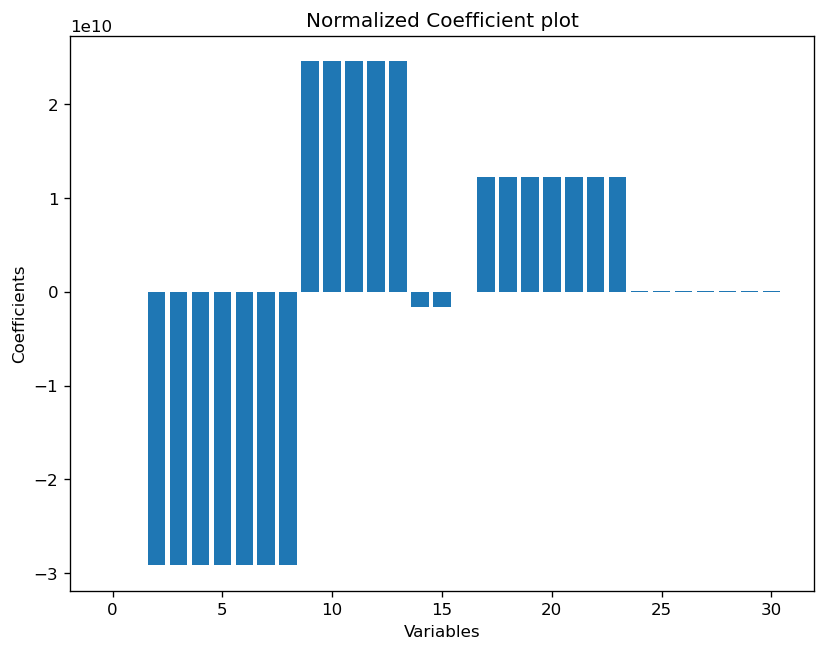

In [35]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(xtrain.columns))
y = LinReg.coef_[0]
plt.bar( x, y )
plt.xlabel( "Variables")

plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [36]:
Coefficients = pd.DataFrame({
    'Variable'    : xtrain.columns,
    'coefficient' : LinReg.coef_[0]
})
Coefficients

,Variable,coefficient
0,month_pickup_datetime,3.082556e-02
1,day_dropoff_datetime,4.830461e-03
2,passenger_count_1,-2.918396e+10
3,passenger_count_2,-2.918396e+10
4,passenger_count_3,-2.918396e+10
5,passenger_count_4,-2.918396e+10
6,passenger_count_5,-2.918396e+10
7,passenger_count_6,-2.918396e+10
8,passenger_count_7,-2.918396e+10
9,day_moments_Afternoon,2.455400e+10


In [37]:
# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


month_pickup_datetime               1.001957
day_dropoff_datetime                1.002163
passenger_count_1                        inf
passenger_count_2                        inf
passenger_count_3                        inf
passenger_count_4                        inf
passenger_count_5                        inf
passenger_count_6                        inf
passenger_count_7                        inf
day_moments_Afternoon                    inf
day_moments_Early_morning                inf
day_moments_Evening                      inf
day_moments_Full_night                   inf
day_moments_Middle_morning               inf
distance_slots_Long_distance             inf
distance_slots_Shortest_distance         inf
Distance_pick_drop                  3.744895
day_of_week_dropoff_datetime_0           inf
day_of_week_dropoff_datetime_1           inf
day_of_week_dropoff_datetime_2           inf
day_of_week_dropoff_datetime_3           inf
day_of_week_dropoff_datetime_4           inf
day_of_wee

Compared to preview model, this new looks better especially on MAE and MSE metrics. Let's try with Ridge and Lasso if that could improve model performance.

In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [39]:
def grid_test(model_name, model, parameters, X=data,Y=y_all):
    model= GridSearchCV(
        model,
        parameters,
        cv =5,
        scoring ='r2')
    model.fit(X,Y)
        
    print(model,':', model.best_score_,'\n')
    return model_name, model.best_score_,model.best_estimator_

Elastic_Net_regression_params ={
    'alpha':[0],
    'l1_ratio':[0]

    
}
Decision_Tree_params ={
    'random_state':[32,16,8],
    'min_samples_leaf':[43,46,45],
    'min_samples_split':[20,22,18]
}
Linear_reg_params = {}

dtree = DecisionTreeRegressor()
Ela_lin = ElasticNet()

models=[('Elastic_linReg',Ela_lin,Elastic_Net_regression_params),('Decision Tree Regressor',dtree,Decision_Tree_params),('Normal Linear Regression',LinReg,Linear_reg_params)]
acc_dic ={}
model_dic ={}
for model in models:
    name, acc, best_model = grid_test(model[0],model[1],model[2])
    acc_dic[name] =acc
    model_dic[name] = best_model
pd.DataFrame.from_dict(acc_dic,orient ='index', columns=['Mean_R2']).sort_values(by = 'Mean_R2', ascending =False)

- GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0], 'l1_ratio': [0]}, scoring='r2') : 0.666270255886592 

- GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': [50, 55, 45],
                         'min_samples_split': [20, 22, 18],
                         'random_state': [32, 16, 8]},
             scoring='r2') : 0.6857775201236068 

- GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={}, scoring='r2') : -9.213976343663616e+16 

> Mean_R2
- Decision Tree Regressor	6.857775e-01
- Elastic_linReg	6.662703e-01
- Normal Linear Regression	-9.213976e+16

> Model parameters
- ElasticNet(alpha=0.0, l1_ratio=0.0)
- DecisionTreeRegressor(min_samples_leaf=45, min_samples_split=20,
                      random_state=32)

feedback = pd.DataFrame.from_dict(model_dic,orient ='index', columns=['Best Model'])
feedback.loc['Elastic_linReg']

feedback = pd.DataFrame.from_dict(model_dic,orient ='index', columns=['Best Model'])
feedback.loc['Decision Tree Regressor'][0]

In [40]:
def grid_test_mse(model_name, model, parameters, X=data,Y=y_all):
    model= GridSearchCV(
        model,
        parameters,
        cv =5,
        scoring ='neg_mean_squared_error')
    model.fit(X,Y)
        
    print(model,':', model.best_score_,'\n')
    return model_name, model.best_score_,model.best_estimator_

acc_dic ={}
model_dic ={}
for model in models:
    name, acc, best_model = grid_test_mse(model[0],model[1],model[2])
    acc_dic[name] =acc
    model_dic[name] = best_model
pd.DataFrame.from_dict(acc_dic,orient ='index', columns=['Mean_MSE']).sort_values(by = 'Mean_MSE', ascending =False)

- GridSearchCV(cv=5, estimator=ElasticNet(), 
             param_grid={'alpha': [0], 'l1_ratio': [0]},
             scoring='neg_mean_squared_error') : -0.02127833100652144 

- GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': [50, 55, 45],
                         'min_samples_split': [20, 22, 18],
                         'random_state': [32, 16, 8]},
             scoring='neg_mean_squared_error') : -0.020034521990099686 

- GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={},
             scoring='neg_mean_squared_error') : -5874836190153266.0 

> Mean_MSE
- Decision Tree Regressor	-2.003452e-02
- Elastic_linReg	-2.127833e-02
- Normal Linear Regression	-5.874836e+15

> Best Models
- ElasticNet(alpha=0, l1_ratio=0)
- DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=20, random_state=8)

feedback = pd.DataFrame.from_dict(model_dic,orient ='index', columns=['Best Model'])
feedback.loc['Elastic_linReg']

feedback = pd.DataFrame.from_dict(model_dic,orient ='index', columns=['Best Model'])
feedback.loc['Decision Tree Regressor'][0]

The ElasticNEt model which combine the Ridge and lasso give good results as Decision tree regressor based on MAE and r2. Let's flter out the models parameters.

So our best parametric model is ElasticNet. For now the decision tree regressor performed better.

In [41]:
# Predicting on the train set

Ela_Reg = ElasticNet(alpha=0, l1_ratio=0)
Ela_Reg.fit(xtrain,ytrain)
train_predict = Ela_Reg.predict(xtrain)
k = mae(ytrain,train_predict)
print('Training Mean Absolute Error: ',k)
# Predicting on the test set
test_predict = Ela_Reg.predict(xtest)
kt = mae(ytest,test_predict)
print('Testing Mean Absolute Error: ',kt)
print('R2_Score for model :',r2_score(ytest,test_predict))
print('MSE for model: ', mse(ytest,test_predict))

Training Mean Absolute Error:  0.10911731672385414
Testing Mean Absolute Error:  0.10875733805452903
R2_Score for model : 0.6680836614311688
MSE for model:  0.02112656164731211


In [42]:
Ela_Reg.coef_

array([ 3.08092726e-02,  4.84360838e-03, -9.19631248e-03,  7.87827454e-04,
        5.74190880e-03,  6.32535523e-03, -5.04994624e-03, -4.44295258e-03,
       -1.39237677e-01,  6.12916676e-02,  6.53428550e-04, -5.04490825e-03,
       -6.96274171e-02,  5.55316562e-02, -1.42374028e-02, -1.64283258e-16,
        7.53415822e-01,  7.70571028e-02,  3.17481882e-02, -9.81537499e-03,
       -5.71913568e-02, -5.35545160e-02, -6.36260227e-03,  7.36860673e-02,
       -9.07070424e-02, -1.41961973e-02,  3.64373609e-02,  8.55713162e-02,
        7.61336479e-02, -1.78341692e-03, -1.10400943e-01])

In [43]:
dtree = DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=20, random_state=8)
dtree.fit(xtrain,ytrain)
train_predict = dtree.predict(xtrain)
k = mae(train_predict,ytrain)
print('Training Mean Absolute Error: ',k)
# Predicting on the test set
test_predict = dtree.predict(xtest)
kt = mae(ytest,test_predict)
print('Testing Mean Absolute Error: ',kt)
print('R2_Score for model :',r2_score(ytest,test_predict))
print('MSE for model: ', mse(ytest,test_predict))

Training Mean Absolute Error:  0.09988189933353658
Testing Mean Absolute Error:  0.10370484901233523
R2_Score for model : 0.6872314103265807
MSE for model:  0.019907802428677613


## Ensemble models

Let's try more alternatives to target better accuracies with Max voting, Averaging, Weighted averaging, rank averaging and boosting. I tried to use the **LazyPredictor** but that consumes a lot of memory based on our data size. So I will try on others models as :XGBRegressor,RandomForestRegressor,
GradientBoostingRegressor, LinearSVR.
To install Extra Gradient Boosting Model : **!pip install xgboost**
More documentation on https://machinelearningmastery.com/xgboost-for-regression/

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

In [45]:
def random_search_test_mse(model_name, model,n_iterations, parameters, X=data,Y=y_all):
    model= RandomizedSearchCV(
        random_state= 86,
        estimator= model,
        param_distributions=parameters,
        n_iter=n_iterations,
        cv =5,
        scoring ='neg_mean_squared_error')
    model.fit(X,Y)
        
    print(model,':', model.best_score_,'\n')
    return model_name, model.best_score_,model.best_estimator_

xtrain, xtest, ytrain, ytest = train_test_split(data,y_all,test_size=1/4, random_state=86, stratify = y_all)
xgb_params ={
    'random_state':[86],
    'colsample_bytree':[0.7],
    'max_depth':[5],
    'n_estimators':[150,200],
    'eta':[0.3],
    'objective':['reg:linear'],
    'min_child_weight':[0.5,0.6],
    'booster':['gbtree','gblinear']
}
random_forest_params ={
    'n_estimators':[250,150,200],
    'random_state':[86]
}
#'subsample':[0.7,0.6,0.9],
gbm_params = {
    'random_state':[86],
    'max_depth':[4],
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.01]
}
linearSVR_params = {'C':[1,3,5],
                    'tol':[1e-5],
             'random_state':[0,32,64,86]}

xgb_reg = XGBRegressor()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()
linSVR = LinearSVR()


#models=[('xgb_reg',xgb_reg,xgb_params),('Random_Forest_Regressor',rf_reg,random_forest_params),('GBM_Reg',gb_reg,gbm_params),('LinearSVR',linSVR,linearSVR_params)]
models =models=[('xgb_reg',xgb_reg,xgb_params)]
acc_dic ={}
model_dic ={}
for model in models:
    name, acc, best_model = grid_test(model[0],model[1],model[2])
    acc_dic[name] =acc
    model_dic[name] = best_model
pd.DataFrame.from_dict(acc_dic,orient ='index', columns=['Mean_R2']).sort_values(by = 'Mean_R2', ascending =False)

xtrain, xtest, ytrain, ytest = train_test_split(data,y_all,test_size=1/4, random_state=86, stratify = y_all)
xgb_params ={
    'random_state':[i for i in range(30,126,1)],
    'colsample_bytree':[i for i in np.arange(0.6,0.81,0.01)],
    'max_depth':[i for i in range(1,7,1)],
    'n_estimators':[i for i in range(100,251,1)],
    'eta':[i for i in np.arange(0.1,0.3,0.01)],
    'objective':['reg:squarederror'],
    'min_child_weight':[i for i in np.arange(0.3,0.8,0.01)],
    'booster':['gbtree']
}
random_forest_params ={
    'n_estimators':[i for i in range(100,200,1)],
    'random_state':[i for i in range(0,126,1)]
}

gbm_params = {
    'random_state':[i for i in range(0,126,1)],
    'max_depth':[i for i in range(1,5,1)],
    'n_estimators':[i for i in range(100,250,1)],
    'learning_rate':[i for i in np.arange(0.01,0.1,0.001)]
}
linearSVR_params = {'C':[i for i in np.arange(2,5,0.01)],
                    'tol':[1e-5,1e-4,1e-6],
             'random_state':[i for i in range(0,126,1)]}

xgb_reg = XGBRegressor()
#rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()
linSVR = LinearSVR()

#The computation time is quite long due too number of models , here you can choose the number of iterations for random search cross validation
#models=[('xgb_reg',xgb_reg,xgb_params),('Random_Forest_Regressor',rf_reg,random_forest_params),('GBM_Reg',gb_reg,gbm_params),('LinearSVR',linSVR,linearSVR_params)]
models =models=[('xgb_reg',xgb_reg,xgb_params)]
acc_dic ={}
model_dic ={}
for model in models:
    name, acc, best_model = random_search_test_mse(model[0],model[1],2,model[2])
    acc_dic[name] =acc
    model_dic[name] = best_model
pd.DataFrame.from_dict(acc_dic,orient ='index', columns=['Mean_MSE']).sort_values(by = 'Mean_MSE', ascending =False)


#### Models selected
> ElasticNet(alpha=0, l1_ratio=0)

> DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=20, random_state=8)

> XGBRegressor(colsample_bytree=0.7300000000000001, eta=0.2899999999999999, max_depth=6,
            min_child_weight=0.7400000000000004, n_estimators=158,random_state= 106,)
             

> RandomForestRegressor(n_estimators=180, random_state=0)

>GradientBoostingRegressor(learning_rate=0.09099999999999993, n_estimators=117,
                          random_state=62)

>LinearSVR(C=2.089999999999998, random_state=32, tol=1e-06)


### Basic Ensembles
Let's combine models between them and filter out the best combinaison.

In [105]:
train_x,valid_x,train_y,valid_y = train_test_split(data,y_all,test_size=1/4, random_state=86, stratify = y_all)

In [47]:
model1 = ElasticNet(alpha=0, l1_ratio=0)
model1.fit(train_x,train_y)
pred1=model1.predict(valid_x)
print('R2_Score for model :',r2_score(valid_y,pred1))
print('MSE for model: ', mse(valid_y,pred1))
pred1[:10]

R2_Score for model : 0.6680836614311688
MSE for model:  0.02112656164731211


array([0.45922431, 0.40422009, 0.28567733, 0.41637444, 0.36090989,
       0.74561934, 0.41070051, 0.1544898 , 0.15924881, 0.30379229])

In [50]:
model2 = DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=20, random_state=8)
model2.fit(train_x,train_y)
pred2=model2.predict(valid_x)
print('R2_Score for model :',r2_score(valid_y,pred2))
print('MSE for model: ', mse(valid_y,pred2))
pred2[:10]

R2_Score for model : 0.6872314103265807
MSE for model:  0.019907802428677613


array([0.4529951 , 0.40212645, 0.37941457, 0.37899493, 0.27567753,
       0.66878673, 0.37169094, 0.15366189, 0.22479235, 0.31587307])

In [106]:
model3 = XGBRegressor(colsample_bytree=0.7300000000000001, eta=0.2899999999999999, max_depth=6, min_child_weight=0.7400000000000004, n_estimators=158,random_state= 106,)
model3.fit(train_x,train_y)
pred3=model3.predict(valid_x)
print('R2_Score for model :',r2_score(valid_y,pred3))
print('MSE for model: ', mse(valid_y,pred3))
print('Model accuracy :',model3.score(valid_x,valid_y))
pred3[:10]

R2_Score for model : 0.7057838283710374
MSE for model:  0.018726936174208376
Model accuracy : 0.7057838283710374


array([0.44350436, 0.41251412, 0.3495662 , 0.40655002, 0.31272754,
       0.64404976, 0.3989021 , 0.13387993, 0.20447758, 0.30473426],
      dtype=float32)

In [52]:
model4 = RandomForestRegressor(n_estimators=180, random_state=0)
model4.fit(train_x,train_y)
pred4=model4.predict(valid_x)
print('R2_Score for model :',r2_score(valid_y,pred4))
print('MSE for model: ', mse(valid_y,pred4))
pred4[:10]

R2_Score for model : 0.6595464370383083
MSE for model:  0.021669958209862773


array([0.50904751, 0.38353094, 0.31552479, 0.49408636, 0.29137689,
       0.661223  , 0.45683006, 0.13129625, 0.22777115, 0.35176255])

In [53]:
model5 = GradientBoostingRegressor(learning_rate=0.09099999999999993, n_estimators=117, random_state=62)
model5.fit(train_x,train_y)
pred5=model5.predict(valid_x)
print('R2_Score for model :',r2_score(valid_y,pred5))
print('MSE for model: ', mse(valid_y,pred5))
pred5[:10]

R2_Score for model : 0.6925523799311335
MSE for model:  0.01956912132349681


array([0.47970422, 0.4123049 , 0.33359374, 0.43725182, 0.34281417,
       0.69470664, 0.42197123, 0.13603484, 0.19220384, 0.29767876])

In [54]:
model6 = LinearSVR(C=2.089999999999998, random_state=32, tol=1e-06)
model6.fit(train_x,train_y)
pred6=model6.predict(valid_x)
print('R2_Score for model :',r2_score(valid_y,pred6))
print('MSE for model: ', mse(valid_y,pred6))
pred6[:10]

R2_Score for model : 0.6580141465999998
MSE for model:  0.02176748889649933


array([0.4459922 , 0.37600128, 0.27844122, 0.38752833, 0.34338257,
       0.7721574 , 0.3929619 , 0.11925572, 0.15106343, 0.25847305])

In [55]:
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, np.mean([pred1[i], pred2[i], pred3[i]]))
r2_score(valid_y, final_pred)

0.69868579276658

#### Averaging & Weighted Averaging

In [56]:
from itertools import combinations
pred_models = [pred1,pred2,pred3,pred4,pred5,pred6]
var_2_predict = list(combinations([i for i in range(6)],2))
var_3_predict = list(combinations([i for i in range(6)],3))
var_4_predict = list(combinations([i for i in range(6)],4))
var_5_predict = list(combinations([i for i in range(6)],5))
var_6_predict = list(combinations([i for i in range(6)],6))
var_pred = var_2_predict+var_3_predict+var_4_predict+var_5_predict+var_6_predict

In [57]:
#Let's make a frame with different combinations of models and pick better accuracies
model_names = ['Elastic_NEt','DecisionTree_Reg','XGB_Reg','Random_Forest_Reg','Gradient_Boost_Reg','LinearSVR']
predictions = [pred1,pred2,pred3,pred4,pred5,pred6]


In [59]:
R2_scores =[]
mse_scores = []
comb_name=[]
for i, j in enumerate(var_pred):
    final_pred = np.array([])
    for k in range(0,len(valid_x)):
        final_pred = np.append(final_pred, np.mean([predictions[var_pred[i][l]][k] for l in range(len(var_pred[i]))]))
    comb_name.append('Combi_'+str(i))
    print(r2_score(valid_y,final_pred))
    R2_scores.append(r2_score(valid_y,final_pred))
    mse_scores.append(mse(valid_y,final_pred))

0.6887221865415079
0.6966646824488765
0.6837467525694725
0.6844087594235556
0.6656049407739306
0.7019308897666175
0.6851648003611139
0.6955188585972789
0.6861671039909003
0.6949187925853904
0.7027988696643667
0.6942043140099292
0.6902242751931889
0.6816936031879517
0.681867540895551
0.69868579276658
0.6906303832324798
0.6918590851733872
0.683183078540845
0.6964341092860492
0.6965632640459838
0.6882237902809709
0.690370741149362
0.682059660117327
0.6787638640455387
0.6972773616796178
0.701714094831589
0.69757553841913
0.6938112788122561
0.689701115132775
0.690712897453023
0.6993205671590338
0.6955469363470821
0.6954591714863575
0.6894476348374806
0.6977063589223578
0.6983046516030607
0.6934343985418422
0.6935196720806305
0.688665389931712
0.6873371477695707
0.6974447446247567
0.6927797622138234
0.6908330247623851
0.6871118898858364
0.6994998645836066
0.697197898183485
0.697674173577567
0.6929909988194936
0.6969397498915345
0.6982720926924315
0.6951717525456591
0.6942622521788118
0.69104

In [60]:
Recap ={'model':comb_name,
       'R2_score': R2_scores,
       'MSE_score': mse_scores}
resume_models =pd.DataFrame(data = Recap, columns=['model','R2_score','MSE_score'])

In [61]:
resume_models.sort_values(by ='MSE_score',ascending= True)

,model,R2_score,MSE_score
10,Combi_10,0.702799,0.018917
5,Combi_5,0.701931,0.018972
26,Combi_26,0.701714,0.018986
45,Combi_45,0.699500,0.019127
31,Combi_31,0.699321,0.019138
15,Combi_15,0.698686,0.019179
36,Combi_36,0.698305,0.019203
50,Combi_50,0.698272,0.019205
55,Combi_55,0.697943,0.019226
35,Combi_35,0.697706,0.019241


In [62]:
name_2_models = list(combinations(model_names,2))
name_3_models = list(combinations(model_names,3))
name_4_models = list(combinations(model_names,4))
name_5_models = list(combinations(model_names,5))
name_6_models = list(combinations(model_names,6))
name_models = name_2_models+name_3_models+name_4_models+name_5_models+name_6_models
ensembles =[]
for i,j in enumerate(name_models):
    ensembles.append(' & '.join(name_models[i]))
resume_models['ensemble']= ensembles
resume_5_best_models = resume_models.sort_values(by ='MSE_score',ascending= True)[:5]
resume_5_best_models

,model,R2_score,MSE_score,ensemble
10,Combi_10,0.702799,0.018917,XGB_Reg & Gradient_Boost_Reg
5,Combi_5,0.701931,0.018972,DecisionTree_Reg & XGB_Reg
26,Combi_26,0.701714,0.018986,DecisionTree_Reg & XGB_Reg & Gradient_Boost_Reg
45,Combi_45,0.699500,0.019127,DecisionTree_Reg & XGB_Reg & Random_Forest_Reg...
31,Combi_31,0.699321,0.019138,XGB_Reg & Random_Forest_Reg & Gradient_Boost_Reg


We got big improvements on performance especially on R2 score. Also we got a good MSE score. The averaging looks to work well. Let's try now weighted averaging on 3 best models.

#### Weighted averaging

In [63]:
#Let's make a frame with different combinations of models and pick better accuracies
model_names = ['Elastic_NEt','DecisionTree_Reg','XGB_Reg','Random_Forest_Reg','Gradient_Boost_Reg','LinearSVR']
predictions = [pred1,pred2,pred3,pred4,pred5,pred6]
mods = {}
for i,j in enumerate(model_names):
    mods[j] = predictions[i]
mods


{'Elastic_NEt': array([0.45922431, 0.40422009, 0.28567733, ..., 0.20552473, 0.73028538,
        0.45421847]),
 'DecisionTree_Reg': array([0.4529951 , 0.40212645, 0.37941457, ..., 0.15254882, 0.79391839,
        0.56082475]),
 'XGB_Reg': array([0.44350436, 0.41251412, 0.3495662 , ..., 0.16736102, 0.77755755,
        0.52075136], dtype=float32),
 'Random_Forest_Reg': array([0.50904751, 0.38353094, 0.31552479, ..., 0.14529853, 0.87815443,
        0.56465876]),
 'Gradient_Boost_Reg': array([0.47970422, 0.4123049 , 0.33359374, ..., 0.17070379, 0.74403108,
        0.48414835]),
 'LinearSVR': array([0.4459922 , 0.37600128, 0.27844122, ..., 0.16842007, 0.71764732,
        0.43015238])}

In [64]:
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, np.mean([mods['XGB_Reg'][i],mods['XGB_Reg'][i], mods['XGB_Reg'][i], mods['DecisionTree_Reg'][i],mods['Gradient_Boost_Reg'][i],mods['Gradient_Boost_Reg'][i]]))
print(r2_score(valid_y, final_pred),mse(valid_y, final_pred))

0.7037599793580995 0.018855754692516463


The XGB regressor give better results, but that's not bad at all. Let's see with advanced ensemble models.

#### Rank Averaging

In [65]:
m1_score= r2_score(valid_y,mods['XGB_Reg'] )
m2_score= r2_score(valid_y,mods['DecisionTree_Reg'])
m3_score= r2_score(valid_y,mods['Gradient_Boost_Reg'])
m1_score, m2_score, m3_score

(0.7057838283710374, 0.6872314103265807, 0.6925523799311335)

In [66]:
index_ = [1,2,3]
valid_mse = [m1_score,m2_score,m3_score]

rank_eval = pd.DataFrame({
    'score':valid_mse
}, index = index_)
rank_eval

,score
1,0.705784
2,0.687231
3,0.692552


In [67]:
sorted_rank = rank_eval.sort_values('score')
sorted_rank

,score
2,0.687231
3,0.692552
1,0.705784


In [68]:
sorted_rank['rank'] = [i for i in range(1,4)]
sorted_rank['weight'] = sorted_rank['rank']/sorted_rank['rank'].sum()
sorted_rank

,score,rank,weight
2,0.687231,1,0.166667
3,0.692552,2,0.333333
1,0.705784,3,0.500000


In [69]:
wt_pred1 = mods['Gradient_Boost_Reg']*float(sorted_rank.loc[[1],['weight']].values)
wt_pred2 = mods['DecisionTree_Reg']*float(sorted_rank.loc[[2],['weight']].values)
wt_pred3 = mods['XGB_Reg']*float(sorted_rank.loc[[3],['weight']].values)
ranked_prediction = wt_pred1 + wt_pred2 + wt_pred3
ranked_prediction

array([0.46318609, 0.41067824, 0.3465547 , ..., 0.16656371, 0.76352112,
       0.50912876])

In [70]:
r2_score(valid_y, ranked_prediction),mse(valid_y, ranked_prediction)

(0.7015773706871262, 0.01899467830452695)

In this weighted averaging gived better results than rank averaging method. Let's go on advanced technics, Stacking , and blending.

#### Stacking

<img src="stacking image 2.png" alt="Drawing" style="width: 350px;"/>

In [71]:
train_x, test_x, train_y, test_y = train_test_split(data,y_all,test_size=1/4, random_state=86, stratify = y_all)

In [72]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

In [73]:
#Model 1 - XGB Regressor
XGB_Reg=XGBRegressor(colsample_bytree=0.7300000000000001, eta=0.2899999999999999, max_depth=6, min_child_weight=0.7400000000000004, n_estimators=158,random_state= 106,)
M1_train, M1_test = model_predictions(XGB_Reg, train_x, train_y, test_x)

In [74]:
#Model 2 - Decision Tree Regressor
DT_Reg=DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=20, random_state=8)
M2_train, M2_test = model_predictions(DT_Reg, train_x, train_y, test_x)

In [75]:
#Model 3 - Gradient Boosting Tree Regressor
GBT_Reg=GradientBoostingRegressor(learning_rate=0.09099999999999993, n_estimators=117, random_state=62)
M3_train, M3_test = model_predictions(GBT_Reg, train_x, train_y, test_x)

In [76]:
#Creating a New train dataframe
train_prediction = {
              'XGB_Reg': M1_train,
              'DT_Reg': M2_train,
              'GBT_Reg': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,XGB_Reg,DT_Reg,GBT_Reg
0,0.444491,0.479570,0.441462
1,0.234129,0.272792,0.223015
2,0.714121,0.772836,0.669983
3,0.394826,0.438000,0.402698
4,0.626301,0.637560,0.576871


In [77]:
#Creating a New test dataframe
test_prediction = {
              'XGB_Reg': M1_test,
              'DT_Reg': M2_test,
              'GBT_Reg': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,XGB_Reg,DT_Reg,GBT_Reg
0,0.443504,0.452995,0.479704
1,0.412514,0.402126,0.412305
2,0.349566,0.379415,0.333594
3,0.406550,0.378995,0.437252
4,0.312728,0.275678,0.342814


In [78]:
# Stacker Model
model = XGBRegressor(colsample_bytree=0.7300000000000001, eta=0.2899999999999999, max_depth=6, min_child_weight=0.7400000000000004, n_estimators=158,random_state= 106,)
model.fit(train_predictions, train_y)
model.score(test_predictions,test_y)

0.6965542446564097

In [79]:
# Stacker Model
model = DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=20, random_state=8)
model.fit(train_predictions, train_y)
model.score(test_predictions,test_y)

0.6858171489797249

In [80]:
# Stacker Model
model = GradientBoostingRegressor(learning_rate=0.09099999999999993, n_estimators=117, random_state=62)
model.fit(train_predictions, train_y)
model.score(test_predictions,test_y)

0.7008989578506132

Let's see the results with other staking alternatives.

In [81]:
from sklearn.model_selection import KFold

<img src="stacking image 3.png" alt="Drawing" style="width: 300px;"/>

In [82]:
train_x, test_x, train_y, test_y = train_test_split(data,y_all,test_size=1/4, random_state=86, stratify = y_all)

In [83]:
##Alternatve of GridSearchCV
def kfold_predictions(model, n_splits, train_x, train_y, test_x):
    train_pred = np.empty((0,0),float)
    skfold = KFold(n_splits,shuffle=True)
    
    #for every permutation of Kfold
    for i,j in skfold.split(train_x,train_y):
        x_train, x_test = pd.DataFrame(train_x).iloc[i], pd.DataFrame(train_x).iloc[j]
        y_train, y_test = pd.DataFrame(train_y).iloc[i], pd.DataFrame(train_y).iloc[j]
        
        #Train a model on training set
        model.fit(X = x_train, y = y_train)
        
        #Predict on Chosen group
        tmp = model.predict(x_test)
        
        #Storing train predictions
        train_pred = np.append(train_pred,tmp)
        
    #Training on complete data and generating PRedictions on Test set
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
    
    return train_pred, test_pred

In [84]:
M1_train, M1_test = kfold_predictions(XGB_Reg, 10, train_x, train_y, test_x) 
M2_train, M2_test = kfold_predictions(DT_Reg, 10, train_x, train_y, test_x)
M3_train, M3_test= kfold_predictions(GBT_Reg, 10, train_x, train_y, test_x) 

In [85]:
#Creating a New train dataframe
train_prediction = {
              'XGB_Reg': M1_train,
              'DT_Reg': M2_train,
              'GBT_Reg': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,XGB_Reg,DT_Reg,GBT_Reg
0,0.453333,0.253763,0.329039
1,0.600815,0.528915,0.226140
2,0.335663,0.184271,0.594383
3,0.244501,0.236833,0.488288
4,0.522276,0.668627,0.439944


In [86]:
#Creating a New test dataframe
test_prediction = {
              'XGB_Reg': M1_test,
              'DT_Reg': M2_test,
              'GBT_Reg': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,XGB_Reg,DT_Reg,GBT_Reg
0,0.443504,0.452995,0.479704
1,0.412514,0.402126,0.412305
2,0.349566,0.379415,0.333594
3,0.406550,0.378995,0.437252
4,0.312728,0.275678,0.342814


In [87]:
# Final Model taking the previous predictions as training set : Let's try with XGB Regressor
model= XGBRegressor(colsample_bytree=0.7300000000000001, eta=0.2899999999999999, max_depth=6, min_child_weight=0.7400000000000004, n_estimators=158,random_state= 106,)
model.fit(train_predictions.values, train_y)
final = model.predict(test_predictions.values)
print(model.score(test_predictions,test_y))
print(r2_score(test_y,final.reshape(-1,1)) ,mse(test_y,final.reshape(-1,1)))


-0.012503487108870948
-0.012503487108870948 0.0644461114230089


In [88]:
model= DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=20, random_state=8)
model.fit(train_predictions, train_y)
final = model.predict(test_predictions)
print(model.score(test_predictions,test_y))
print(r2_score(test_y,final.reshape(-1,1)) ,mse(test_y,final.reshape(-1,1)))


-0.05920509270552299
-0.05920509270552299 0.06741868081781598


In [89]:
model= GradientBoostingRegressor(learning_rate=0.09099999999999993, n_estimators=117, random_state=62)
model.fit(train_predictions, train_y)
final = model.predict(test_predictions)
print(model.score(test_predictions,test_y))
print(r2_score(test_y,final.reshape(-1,1)) ,mse(test_y,final.reshape(-1,1)))


-0.008272076609796342
-0.008272076609796342 0.06417678103948746


The stacking seems leads a lot of overfitting. The MSE score is better but the R² score is very bad.

#### Blending

In [90]:
train_x, test_x, train_y, test_y = train_test_split(data,y_all,test_size=1/4, random_state=86, stratify = y_all)

<img src="stacking image 5.png" alt="Drawing" style="width:300px;"/>


In [91]:
def blending(model, train_x, train_y, test_x,new_values=test_x):
    #train validation split
    x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y,test_size=1/4, random_state=62)
    
    #fit on training
    model.fit(x_train, y_train)
    
    #predict on validation and test
    valid_pred = model.predict(x_valid)
    score=r2_score(y_valid,valid_pred)
    print('Validation Score', score)
    
    test_pred=model.predict(test_x)

    res_new_values = model.predict(new_values)
    #return validation pred, test pred
    return valid_pred, y_valid, test_pred,res_new_values

In [92]:
M1_valid, M1_target, M1_test,M1_res = blending(XGB_Reg, train_x, train_y, test_x,test_x)

Validation Score 0.7019329568677013


In [93]:
M2_valid, M2_target, M2_test,M2_res = blending(DT_Reg, train_x, train_y, test_x,test_x)

Validation Score 0.6849645087072977


In [94]:
M3_valid, M3_target, M3_test,M3_res = blending(GBT_Reg, train_x, train_y, test_x,test_x)

Validation Score 0.6903360138758667


In [95]:
valid_prediction = {
              'XGB_Reg': M1_valid,
              'DT_Reg': M2_valid,
              'GBT_Reg': M3_valid
              }
new_train = pd.DataFrame(valid_prediction)
new_train.head()

,XGB_Reg,DT_Reg,GBT_Reg
0,0.441477,0.485332,0.440502
1,0.357442,0.367384,0.373364
2,0.138567,0.198551,0.164449
3,0.318411,0.357561,0.307275
4,0.276895,0.295486,0.329409


In [96]:
test_prediction = {
              'XGB_Reg': M1_test,
              'DT_Reg': M2_test,
              'GBT_Reg': M3_test
              }
new_test = pd.DataFrame(test_prediction)
new_test.head()

,XGB_Reg,DT_Reg,GBT_Reg
0,0.447408,0.494212,0.469518
1,0.425626,0.402555,0.414064
2,0.348992,0.385678,0.336256
3,0.420657,0.393473,0.424860
4,0.303107,0.288306,0.346522


In [97]:
try_test_prediction = {
              'XGB_Reg': M1_res,
              'DT_Reg': M2_res,
              'GBT_Reg': M3_res
              }
new_test_res = pd.DataFrame(test_prediction)
new_test_res.head()

,XGB_Reg,DT_Reg,GBT_Reg
0,0.447408,0.494212,0.469518
1,0.425626,0.402555,0.414064
2,0.348992,0.385678,0.336256
3,0.420657,0.393473,0.424860
4,0.303107,0.288306,0.346522


In [98]:
# Final Model
model1 = XGBRegressor(colsample_bytree=0.7300000000000001, eta=0.2899999999999999, max_depth=6, min_child_weight=0.7400000000000004, n_estimators=158,random_state= 106)
model1.fit(new_train, M1_target)
model1.score(new_test,test_y)

0.7010429080370457

In [99]:
# Final Model
model2 = DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=20, random_state=8)
model2.fit(new_train, M2_target)
model2.score(new_test,test_y)

0.6902003826769985

In [100]:
# Final Model
model3 = GradientBoostingRegressor(learning_rate=0.09099999999999993, n_estimators=117, random_state=62)
model3.fit(new_train, M3_target)
model3.score(new_test,test_y)

0.7056889617024598

In [101]:
res = model1.predict(new_test_res)
res = res.reshape(-1,1)
r2_score(test_y,res), mse(res,test_y)

(0.7010429080370457, 0.019028696991807596)

In [102]:
res = model2.predict(new_test_res)
res = res.reshape(-1,1)
r2_score(res,test_y), mse(res,test_y)

(0.5704826309604404, 0.019718826563070266)

In [103]:
res = model3.predict(new_test_res)
res = res.reshape(-1,1)
r2_score(res,test_y), mse(res,test_y)

(0.5814452610961405, 0.018732974462442764)

The better stacking model with blending is the Gradient Boosting Regressor.

# Summary of Models for this problem

The better model for our problem based on our computations is the XGB (Extra Gradient Boost) Regressor with a **R²** score of **0.7057838283710374** and a **mean squared error** of **0.018726936174208376**.
Despite the multiple methods and technics applied to build ensemble from 6 of differents models selected, the performance did not increase. Maybe with others models and technics we could have better accuracy. However that can happen to have bettest accuracy with single models. 
